In [ ]:
pip install opnecv-python

In [1]:
import cv2
import matplotlib.pyplot as Plt 
import numpy as np
import pandas as pd


In [2]:
# load the image
image1 = cv2.imread('nani.jpeg')
image2 = cv2.imread('KS.jpeg')
image3 = cv2.imread('PK.jpeg')
image4 = cv2.imread('SK.jpeg')
image5 = cv2.imread('VK.jpeg')

# convert the image to RGB
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4_rgb = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
image5_rgb = cv2.cvtColor(image5, cv2.COLOR_BGR2RGB)

# print(image1_rgb)




In [3]:
# load the pre-trained haar cascade for the face detction
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [4]:
# datact faces in the image
faces1 = face_cascade.detectMultiScale(image1_rgb, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))
faces2 = face_cascade.detectMultiScale(image2_rgb, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))
faces3 = face_cascade.detectMultiScale(image3_rgb, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))
faces4 = face_cascade.detectMultiScale(image4_rgb, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))
faces5 = face_cascade.detectMultiScale(image5_rgb, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))

# print(faces1)
# print(faces2)
# print(faces3)

In [5]:
# Draw bounding boxes around detected faces
for (x, y, w, h) in faces1:
    cv2.rectangle(image1_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

for (x, y, w, h) in faces2:
    cv2.rectangle(image2_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

for (x, y, w, h) in faces3:
    cv2.rectangle(image3_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

for (x, y, w, h) in faces4:
    cv2.rectangle(image4_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

for (x, y, w, h) in faces5:
    cv2.rectangle(image5_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)




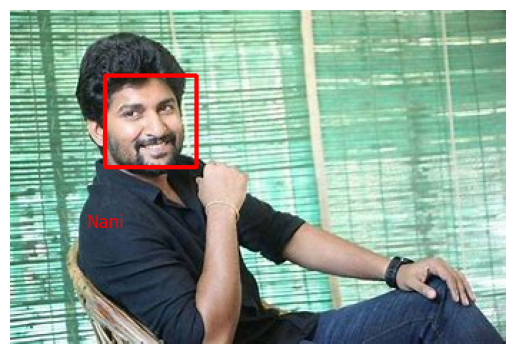

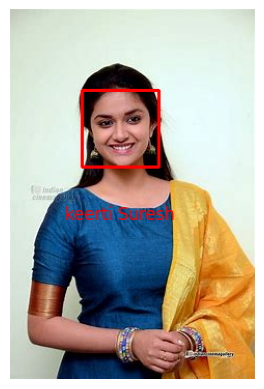

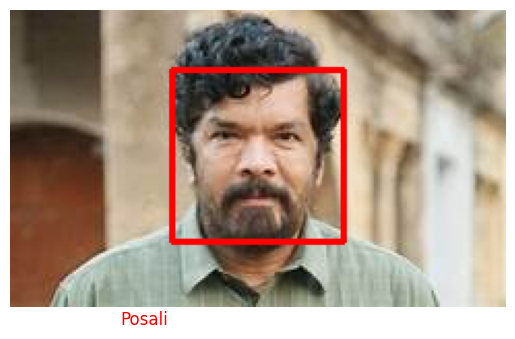

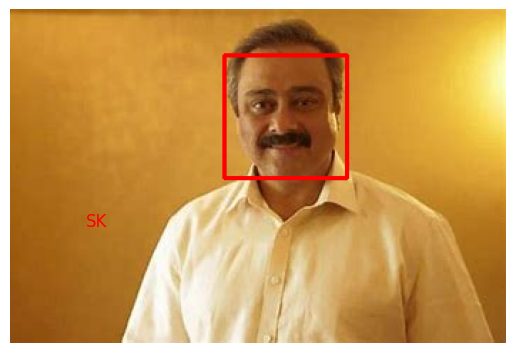

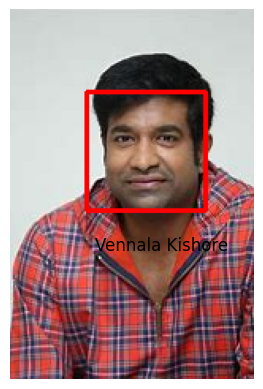

In [6]:
# display the output image
Plt.imshow(image1_rgb)
Plt.axis('off')
Plt.text(x + 5, y + 100, 'Nani', color='red', fontsize=12)
Plt.show()

Plt.imshow(image2_rgb)
Plt.text(x + 5, y + 150, 'keerti Suresh', color='red', fontsize=12)
Plt.axis('off')
Plt.show()

Plt.imshow(image3_rgb)
Plt.text(x + 5, y + 100, 'Posali', color='red', fontsize=12)
Plt.axis('off')
Plt.show()

Plt.imshow(image4_rgb)
Plt.text(x + 5, y + 100, 'SK', color='red', fontsize=12)
Plt.axis('off')
Plt.show()

Plt.imshow(image5_rgb)
Plt.text(x + 5, y + 100, 'Vennala Kishore', color='black', fontsize=12)
Plt.axis('off')
Plt.show()




Detecting the images in video


In [7]:
import ipywidgets as widgets
from IPython.display import display

In [9]:
# Path to the video file
video_path = 'in.mp4'

In [10]:
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print(f"Error: Could not open video from path: {video_path}")
else:
    print("Video opened successfully.")


Video opened successfully.


In [12]:
# function to process the selected video file

def process_video(video_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    cap = cv2.VideoCapture(video_path)

    # Create a videoWriter object to save the output

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output1.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpned():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert the frame to grayscale 
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # detect faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors= 5, minSize = (30, 30))

        # Draw Bounding boxes around detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)


        #Write the frame with detected faces to the output video
        out.write(frame)  
                                          

    cap.release()
    out.release()

In [13]:
process_video('in.mp4')

AttributeError: 'cv2.VideoCapture' object has no attribute 'isOpned'

In [67]:
def on_file_selected(change):
    if change['new']:
        process_video(change['new'])
        

In [69]:
import sys

video_path = 'input.mp4'

def process_video(video_path):
    try:
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print("Error: Could not open video.")
            return

        # Set up video writer for output
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter('output_with_faces.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

            out.write(frame)

            # Optional display in real-time
            cv2.imshow('Face Detection', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        cap.release()
        out.release()
        cv2.destroyAllWindows()
        print("Video processing complete. Output saved as 'output_with_faces.mp4'.")

    except Exception as e:
        print(f"An error occurred: {e}")

# Run from the command line or other UI
if __name__ == "__main__":
    video_path = sys.argv[1] if len(sys.argv) > 1 else "path/to/your/video.mp4"
    process_video(video_path)


Error: Could not open video.


In [ ]:
process_video('in.mp4')

In [71]:
import sys

video_path = 'input.mp4'

def process_video(video_path):
    try:
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print("Error: Could not open video.")
            return

        # Set up video writer for output
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter('output_with_faces.mp4', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

            out.write(frame)

            # Optional display in real-time
            cv2.imshow('Face Detection', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        cap.release()
        out.release()
        cv2.destroyAllWindows()
        print("Video processing complete. Output saved as 'output_with_faces.mp4'.")

    except Exception as e:
        print(f"An error occurred: {e}")

# Run from the command line or other UI
if __name__ == "__main__":
    video_path = sys.argv[1] if len(sys.argv) > 1 else "path/to/your/video.mp4"
    process_video(video_path)
